In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [127]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

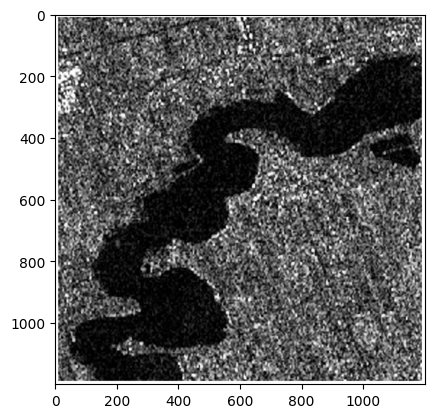

In [128]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [129]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

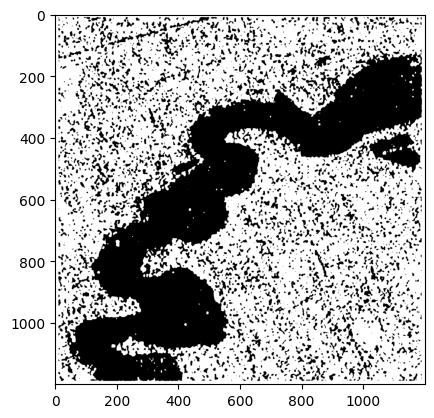

In [130]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [131]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

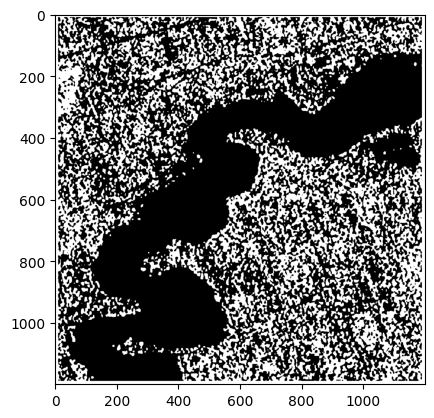

In [132]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [133]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


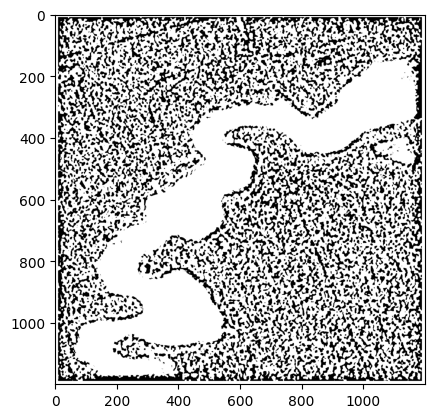

In [134]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [135]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

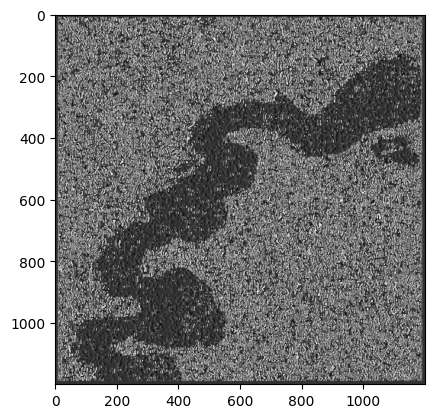

In [136]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

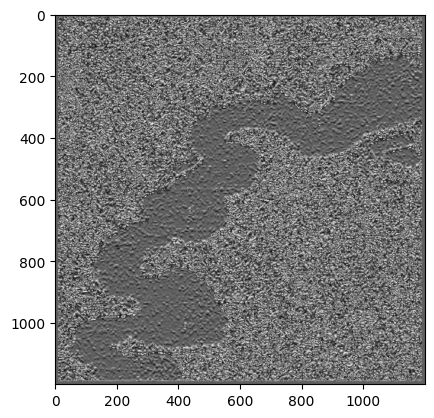

In [137]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [138]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

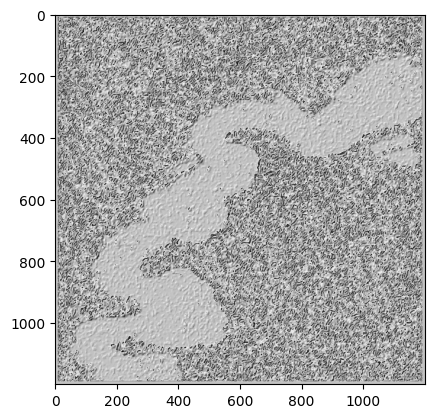

In [139]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [140]:
edges = cv2.Canny(image_gray,100,200)

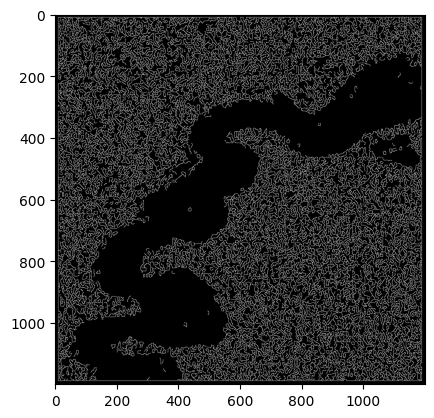

In [141]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [142]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

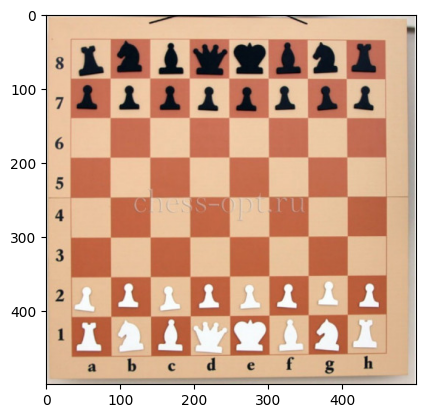

In [143]:
plt.imshow(image)

In [144]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [145]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [146]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

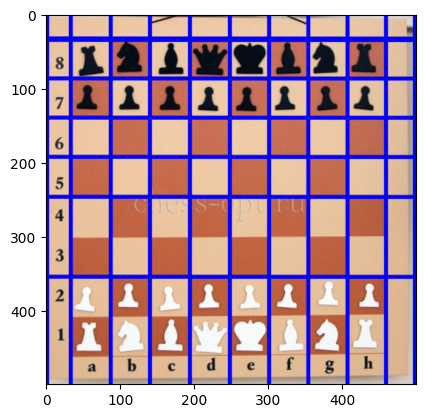

In [147]:
plt.imshow(image)

In [148]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

## 1. Для изображения sar_3.jpg найти наиболее протяженный участок

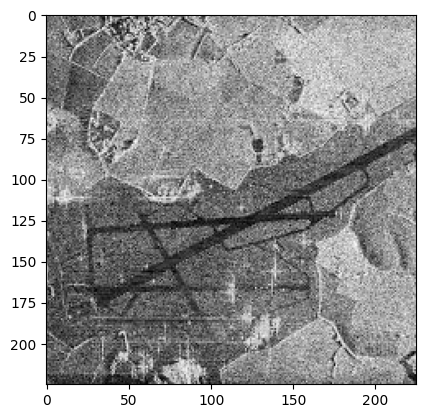

In [149]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

Найдено линий: 3


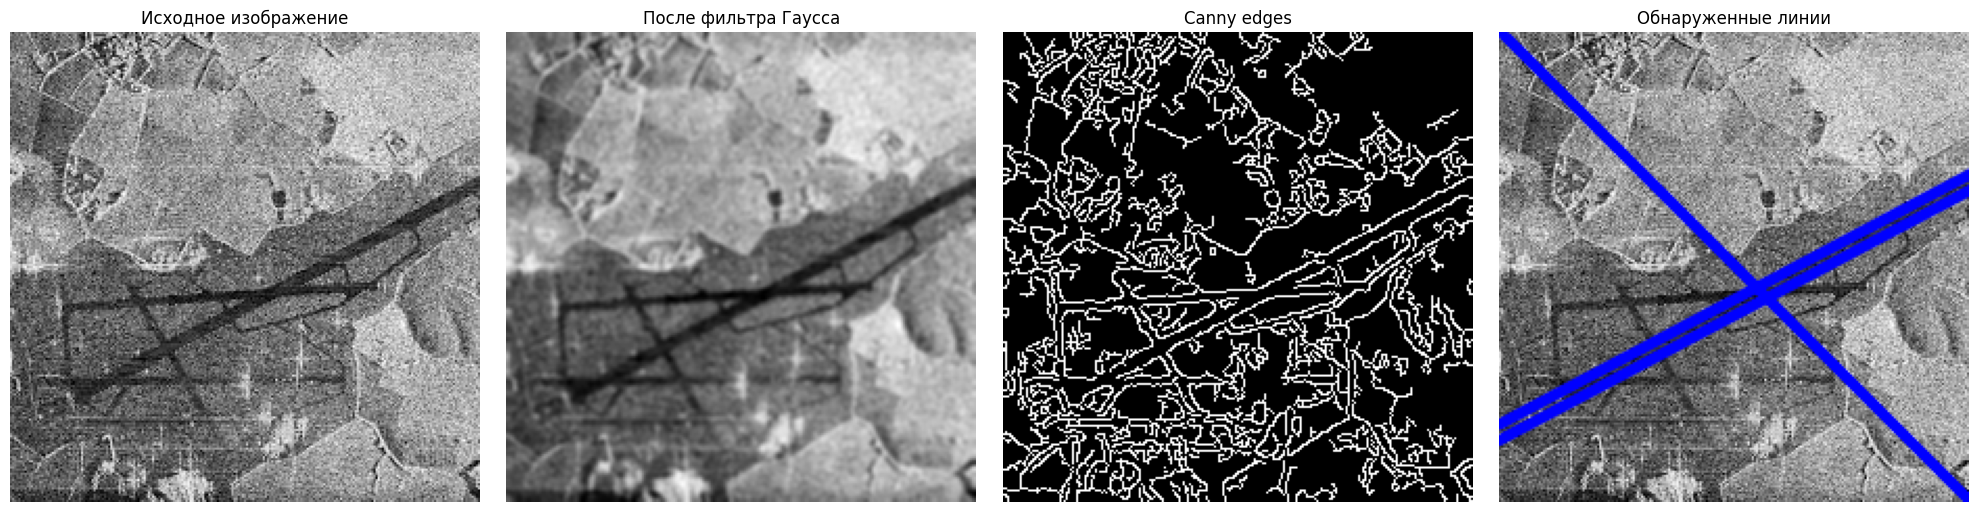

In [150]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gaussian_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)

canny = cv2.Canny(gaussian_blur, 50, 150, apertureSize=3)

lines = cv2.HoughLines(canny, 1, np.pi / 180, 100)

print(f"Найдено линий: {len(lines) if lines is not None else 0}")

image_with_lines = image.copy()

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image_with_lines, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_blur, cmap="gray")
plt.title("После фильтра Гаусса")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(canny, cmap="gray")
plt.title("Canny edges")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_with_lines)
plt.title("Обнаруженные линии")
plt.axis('off')

plt.tight_layout()
plt.show()

Самая длинная линия имеет длину: 253.65 пикселей
Индекс самой длинной линии: 0


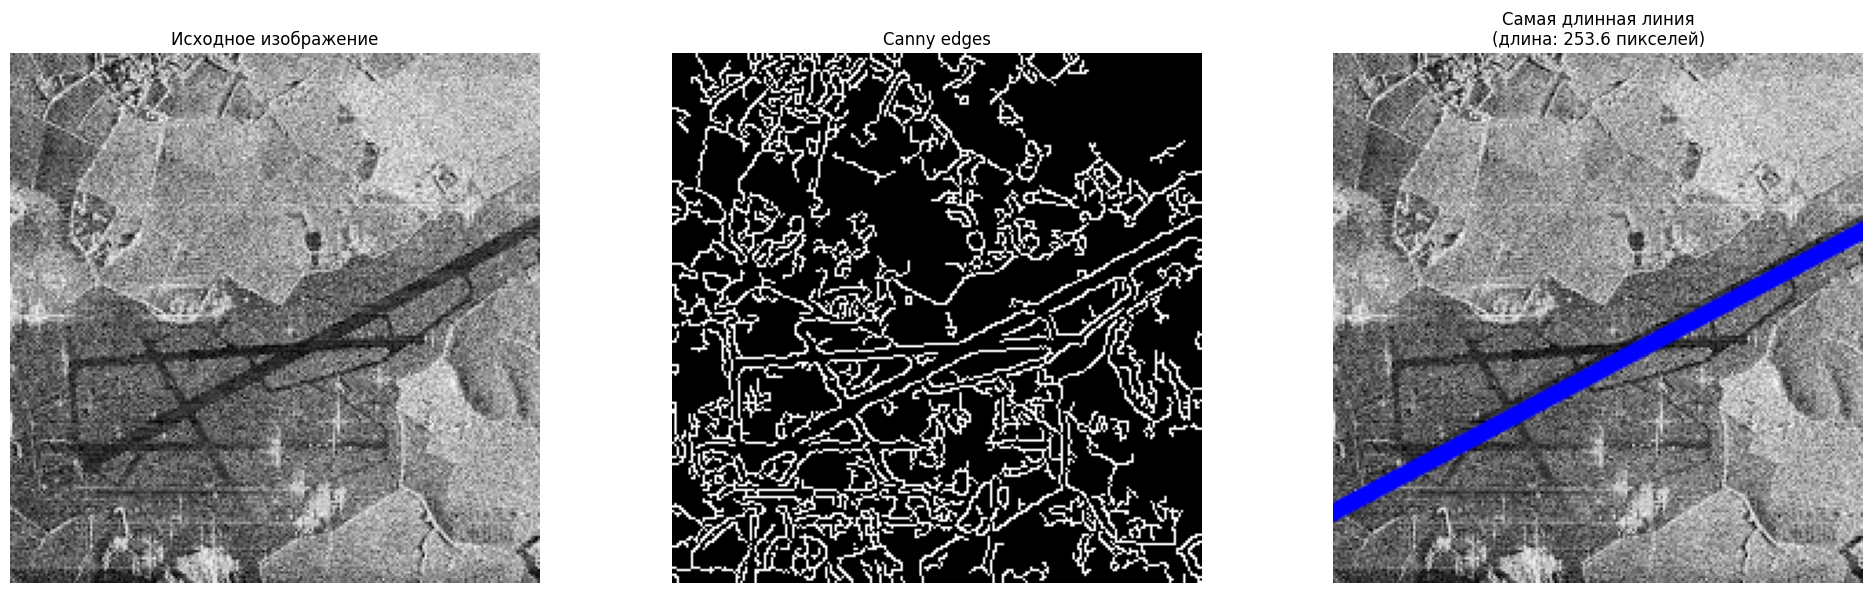

In [151]:
if lines is not None and len(lines) > 0:
    max_length = 0
    longest_line = None
    longest_line_index = -1
    
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        height, width = image_gray.shape
        
        points = []
        
        if abs(b) > 1e-6:
            y_left = (0 - x0) * b / a + y0
            if 0 <= y_left < height:
                points.append((0, int(y_left)))
        
        if abs(b) > 1e-6:
            y_right = (width-1 - x0) * b / a + y0
            if 0 <= y_right < height:
                points.append((width-1, int(y_right)))
        
        if abs(a) > 1e-6:
            x_top = (0 - y0) * a / b + x0
            if 0 <= x_top < width:
                points.append((int(x_top), 0))
        
        if abs(a) > 1e-6:
            x_bottom = (height-1 - y0) * a / b + x0
            if 0 <= x_bottom < width:
                points.append((int(x_bottom), height-1))
        
        if len(points) >= 2:
            max_dist = 0
            for j in range(len(points)):
                for k in range(j+1, len(points)):
                    dist = math.sqrt((points[j][0] - points[k][0])**2 + (points[j][1] - points[k][1])**2)
                    if dist > max_dist:
                        max_dist = dist
            
            if max_dist > max_length:
                max_length = max_dist
                longest_line = lines[i]
                longest_line_index = i
    
    print(f"Самая длинная линия имеет длину: {max_length:.2f} пикселей")
    print(f"Индекс самой длинной линии: {longest_line_index}")
    
    image_longest_line = image.copy()
    
    if longest_line is not None:
        rho = longest_line[0][0]
        theta = longest_line[0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
        pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
        cv2.line(image_longest_line, pt1, pt2, (0, 0, 255), 5, cv2.LINE_AA)
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_gray, cmap="gray")
    plt.title("Исходное изображение")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(canny, cmap="gray")
    plt.title("Canny edges")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(image_longest_line)
    plt.title(f"Самая длинная линия\n(длина: {max_length:.1f} пикселей)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Линии не найдены!")


## 2. Исследование алгоритмов бинаризации для sar_3.jpg


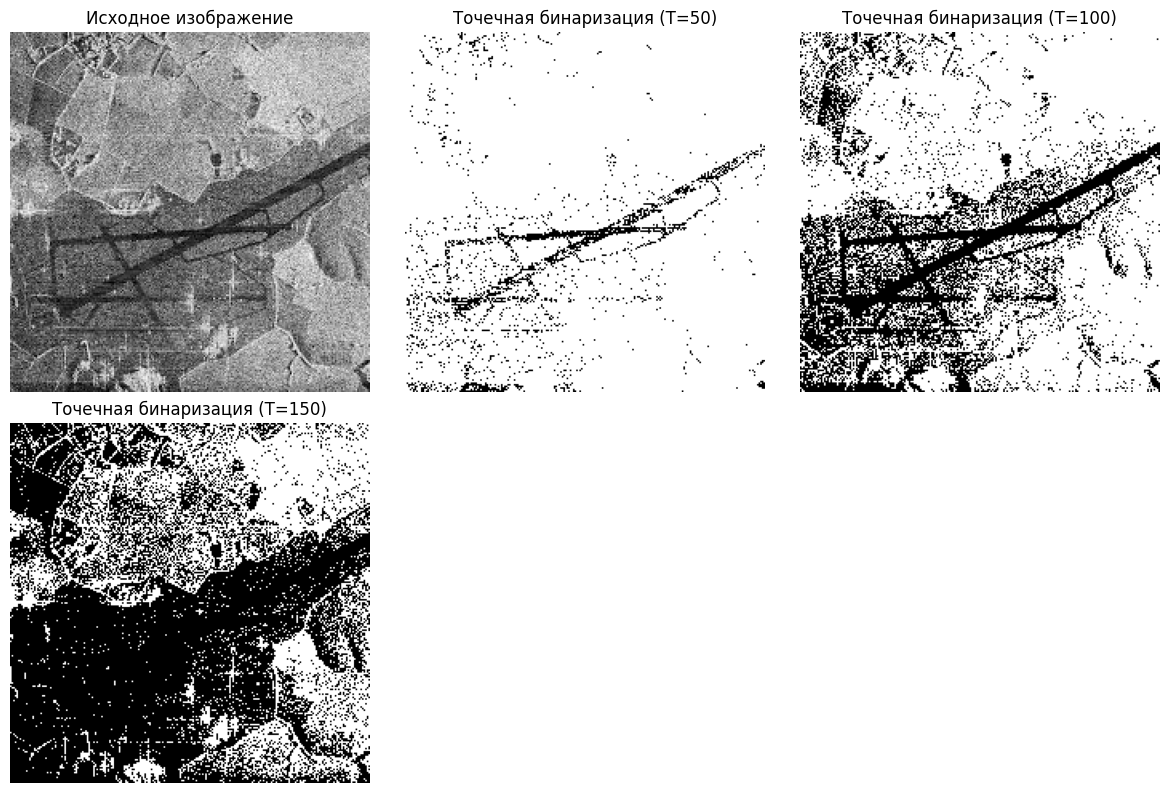

In [152]:
# Загружаем изображение sar_3.jpg
image_sar3 = cv2.imread('sar_3.jpg')
image_sar3_gray = cv2.cvtColor(image_sar3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 8))

# 1. Точечная бинаризация
plt.subplot(2, 3, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

# Различные пороги для точечной бинаризации
thresholds = [50, 100, 150]
for i, T in enumerate(thresholds):
    bin_img = np.zeros_like(image_sar3_gray)
    bin_img[image_sar3_gray < T] = 0
    bin_img[image_sar3_gray >= T] = 255
    
    plt.subplot(2, 3, i+2)
    plt.imshow(bin_img, cmap="gray")
    plt.title(f"Точечная бинаризация (T={T})")
    plt.axis('off')

plt.tight_layout()
plt.show()


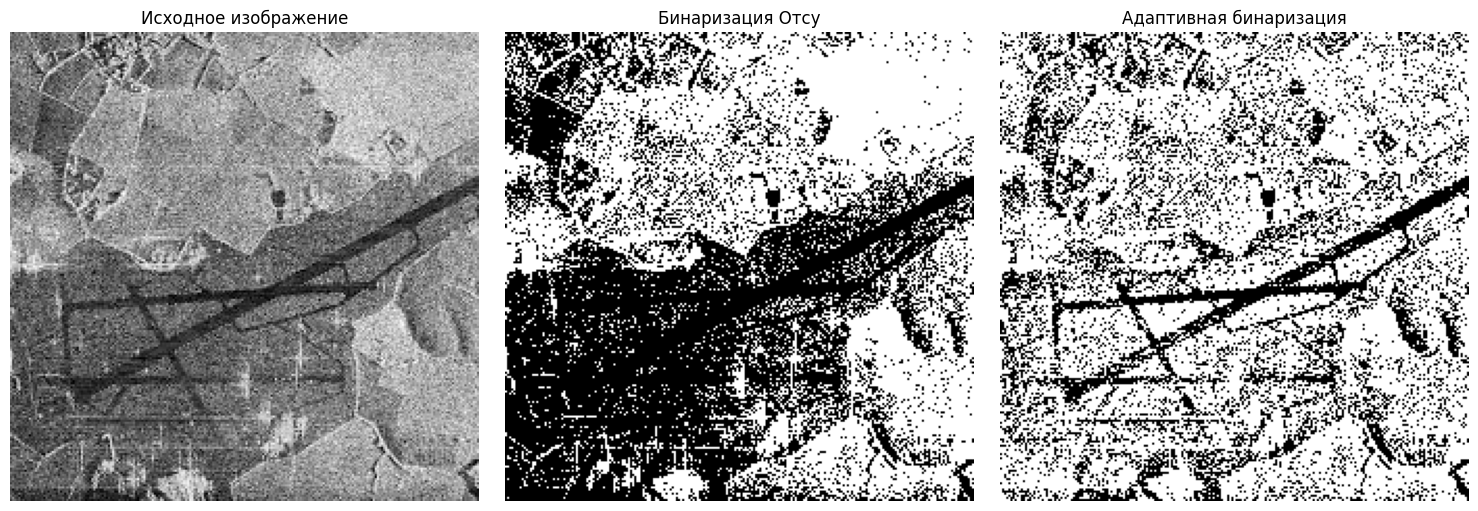

In [153]:
# 2. Бинаризация Отсу
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

# Бинаризация Отсу
_, otsu_bin = cv2.threshold(image_sar3_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1, 3, 2)
plt.imshow(otsu_bin, cmap="gray")
plt.title("Бинаризация Отсу")
plt.axis('off')

# 3. Адаптивная бинаризация
adaptive_bin = cv2.adaptiveThreshold(image_sar3_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 71, 21)

plt.subplot(1, 3, 3)
plt.imshow(adaptive_bin, cmap="gray")
plt.title("Адаптивная бинаризация")
plt.axis('off')

plt.tight_layout()
plt.show()


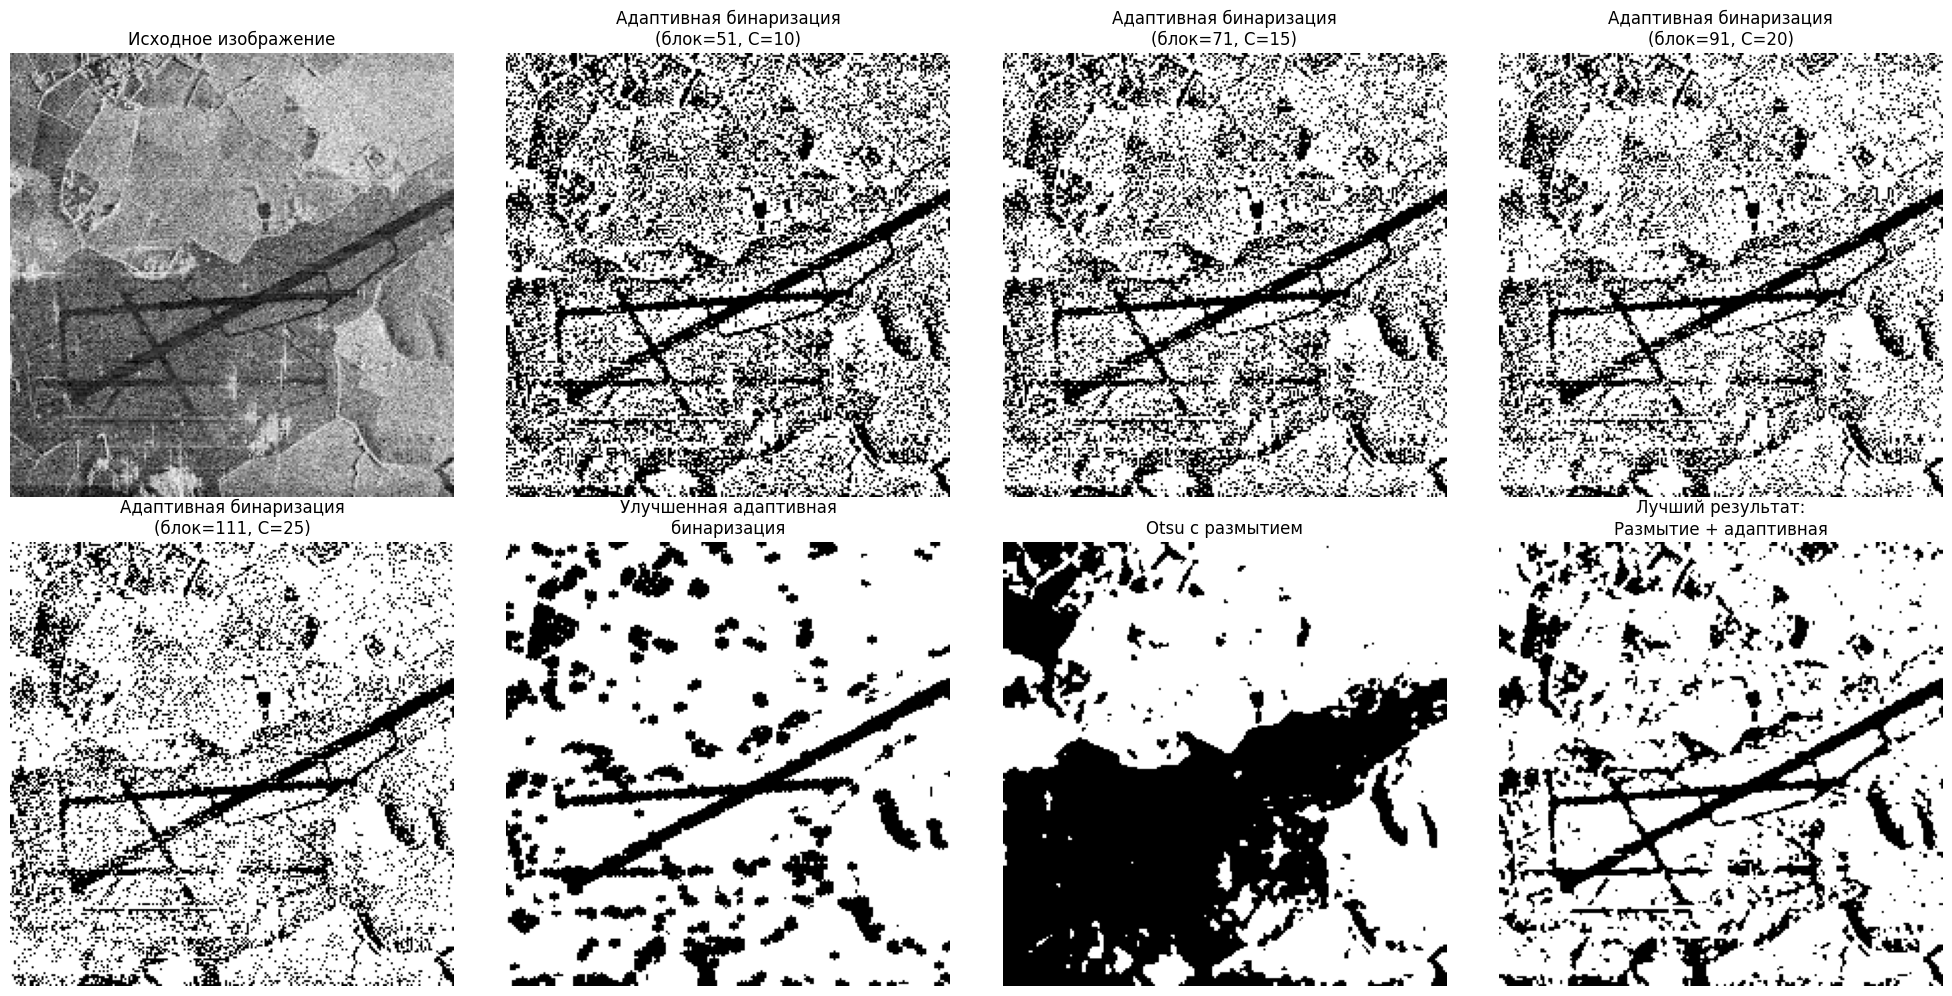

In [154]:
# 3. Выделение дорожной полосы
# Попробуем разные параметры адаптивной бинаризации для лучшего выделения дороги

plt.figure(figsize=(20, 10))

# Исходное изображение
plt.subplot(2, 4, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

# Различные параметры адаптивной бинаризации
block_sizes = [51, 71, 91, 111]
c_values = [10, 15, 20, 25]

for i, (block_size, c_value) in enumerate(zip(block_sizes, c_values)):
    adaptive_bin = cv2.adaptiveThreshold(image_sar3_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, block_size, c_value)
    
    plt.subplot(2, 4, i+2)
    plt.imshow(adaptive_bin, cmap="gray")
    plt.title(f"Адаптивная бинаризация\n(блок={block_size}, C={c_value})")
    plt.axis('off')

# Попробуем комбинацию методов
plt.subplot(2, 4, 6)
# Сначала применим морфологические операции для улучшения
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph = cv2.morphologyEx(image_sar3_gray, cv2.MORPH_CLOSE, kernel)
adaptive_improved = cv2.adaptiveThreshold(morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 71, 15)
plt.imshow(adaptive_improved, cmap="gray")
plt.title("Улучшенная адаптивная\nбинаризация")
plt.axis('off')

# Попробуем Otsu с предобработкой
plt.subplot(2, 4, 7)
blurred = cv2.GaussianBlur(image_sar3_gray, (5, 5), 0)
_, otsu_improved = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_improved, cmap="gray")
plt.title("Otsu с размытием")
plt.axis('off')

# Лучший результат - комбинированный подход
plt.subplot(2, 4, 8)
# Применяем размытие, затем адаптивную бинаризацию
blurred = cv2.GaussianBlur(image_sar3_gray, (3, 3), 0)
final_bin = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 71, 15)
plt.imshow(final_bin, cmap="gray")
plt.title("Лучший результат:\nРазмытие + адаптивная")
plt.axis('off')

plt.tight_layout()
plt.show()
